In [21]:
import requests
import io
from tensorflow.python.lib.io import file_io
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from PIL import Image
from matplotlib.image import imread
import requests
from io import BytesIO
from PIL import Image 
import PIL
import requests
from random import *
import imageio
import matplotlib.pyplot as plt
import os 
import numpy.random as random
import matplotlib.pyplot as plt
import cv2
from urllib.parse import urljoin


## Load Dataset and Useful Functions

In [7]:
## Dataset URLs
house_url = 'gs://quickdraw_dataset/full/numpy_bitmap/house.npy'
fish_url = 'gs://quickdraw_dataset/full/numpy_bitmap/fish.npy'
apple_url = 'gs://quickdraw_dataset/full/numpy_bitmap/apple.npy'
eiffel_tower_url = 'gs://quickdraw_dataset/full/numpy_bitmap/The Eiffel Tower.npy'
squirrel_url = 'gs://quickdraw_dataset/full/numpy_bitmap/squirrel.npy'

In [8]:
## Get the Function Data
def return_data_for_noun(URL):
    f = io.BytesIO(file_io.read_file_to_string(URL, binary_mode=True))
    data = np.load(f)
    data_reshaped = data.reshape(data.shape[0],28,28,1)
    data_reshaped = (data_reshaped - 127.5) / 127.5
    return data_reshaped

In [9]:
##Noun Datasets
house_images = return_data_for_noun(house_url)
fish_images = return_data_for_noun(fish_url)
apple_images = return_data_for_noun(apple_url)
eiffel_tower_images = return_data_for_noun(eiffel_tower_url)
squirrel_images = return_data_for_noun(squirrel_url)

## Playing with Images

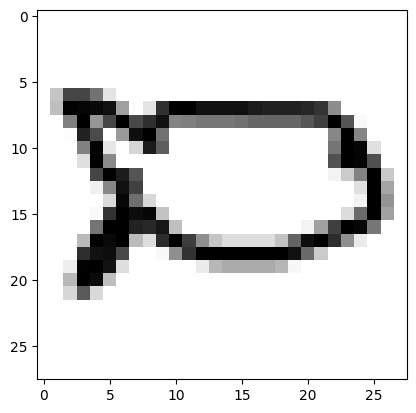

In [10]:
#Generate a picture for all models (if input is A, E, H: generate an Apple, Eiffeltower and House)
fish = plt.imshow(fish_images[21],cmap='gray_r')

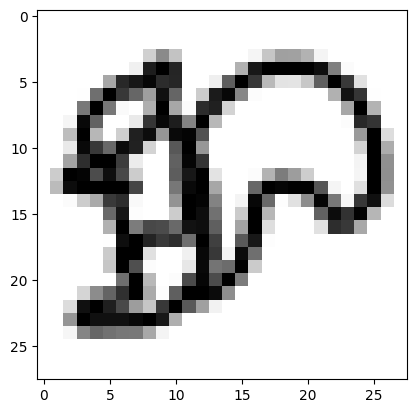

In [11]:
squirrel = plt.imshow(squirrel_images[21],cmap='gray_r')

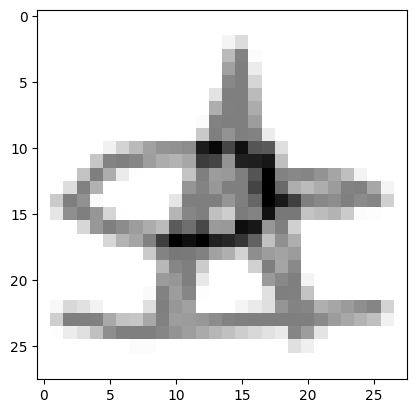

In [12]:
#Combine these pictures into 1 by taking a linear combination of them

new_animal_average = (eiffel_tower_images[0]+fish_images[10]) / 2
plt.imshow(new_animal_average, cmap='gray_r')


In [13]:
squirrel_images[2].shape

(28, 28, 1)

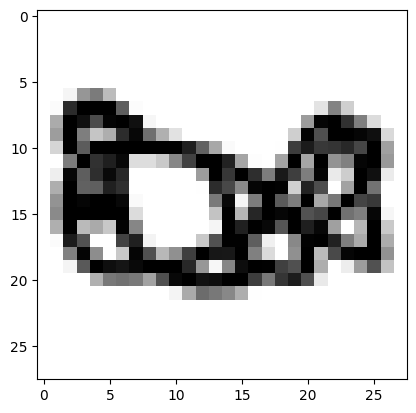

In [14]:
re_shapred_squirell = squirrel_images[2].reshape(28*28)
re_shapred_fish = fish_images[5].reshape(28*28)

output = []
for f, s in zip(re_shapred_squirell,re_shapred_fish):
    if f > s:
        output.append(f)
    else:
        output.append(s)

output = np.array(output)
f_s = output.reshape(28,28,1)
plt.imshow(f_s, cmap='gray_r')

In [15]:
fish_array = np.asarray(fish)
squirrel_array = np.asarray(squirrel)
fish_array

array(<matplotlib.image.AxesImage object at 0x15fe2d330>, dtype=object)

## Pseudocode

In [16]:
!pip install matplotlib
!pip install imageio
!pip install opencv-python

In [48]:
#Create a random image
def generate_image(noun):
    URL = f'http://127.0.0.1:8000/ganify?category={noun}'
    response = requests.get(URL)
    img = Image.open(BytesIO(response.content))
    #img.save("Supercookie.png")
    np_frame = np.array(img.getdata())
    initial_image = np_frame.reshape(28,28,1)
    return initial_image
    

In [18]:
#Test
generate_image("house")
! ls


Cookie.png          Predict_Model.ipynb api                 test4.png
Cookie2.png         Super_Model.ipynb   test.png            test_3.png
Cookie3.png         Supercookie.png     test2.png


In [65]:
import cv2

In [68]:
arr = cv2.imread("Supercookie.png",flags=0)
arr = arr.reshape(*arr.shape,1)
arr.shape

(28, 28, 1)

In [71]:
io.BytesIO(arr.tobytes())

In [115]:
def discriminate_image_classic(noun):
    base_url = "http://127.0.0.1:8000"
    response = requests.request("POST" , 
                            urljoin(base_url , "discriminate") 
                        , params = {"category": noun}
                        , files = {"image": open("Supercookie.png","rb")}
                        )
    return response.json()['prediction']

discriminate_image_classic("house")

-7.375226974487305

In [116]:
#Investigate the image
def discriminate_image(noun,arr):
    image = Image.fromarray((arr.reshape(arr.shape[0],arr.shape[1])).astype(np.uint8))
    bytes_image = io.BytesIO()
    image.save(bytes_image, format='PNG')
    
    base_url = "http://127.0.0.1:8000"
    response = requests.request("POST" , 
                            urljoin(base_url , "discriminate") 
                        , params = {"category": noun}
                        , files = {"image": bytes_image.getvalue()}
                        )
    return response.json()['prediction']


In [117]:
arr.shape

(28, 28, 1)

In [122]:
#Test
discriminate_image("house",arr)

-7.375226974487305

In [61]:
## Add the colours
def color_under_image(color: str, image):

    img_float32 = np.float32(image)
    img = cv2.cvtColor(img_float32, cv2.COLOR_GRAY2RGB)

    img = img.reshape(784,3)
    check = np.array([-1,-1,-1])
    if color == 'green':
        for i in range(784):
            if (img[i]==check).all():
                img[i,0] = np.float32(np.random.uniform(0.5,1.5)*((77-127.5)/127.5))
                img[i,1] = np.float32(np.random.uniform(0.5,1.1)*((216-127.5)/127.5))
                img[i,2]= np.float32(np.random.uniform(0.5,1.5)*((49 - 127.5)/127.5))
        img = img.reshape(28,28,3)
        
    if color == 'red':
        for i in range(784):
            if (img[i]==check).all():
                img[i,0] = np.float32(np.random.uniform(0.5,1.2)*((208-127.5)/127.5))
                img[i,1] = np.float32(np.random.uniform(0.5,1.5)*((32-127.5)/127.5))
                img[i,2]= np.float32(np.random.uniform(0.5,1.5)*((32 - 127.5)/127.5))
        img = img.reshape(28,28,3)
        
    if color == 'blue':
        for i in range(784):
            if (img[i]==check).all():
                img[i,0] = np.float32(np.random.uniform(0.5,1.5)*((52-127.5)/127.5))
                img[i,1] = np.float32(np.random.uniform(0.8,1.1)*((47-127.5)/127.5))
                img[i,2]= np.float32(np.random.uniform(0.5,1.2)*((210 - 127.5)/127.5))
        img = img.reshape(28,28,3)
            
    return img

In [62]:
def image_numpy_mixer(img1, img2, strength):
    #First image conversion
    np_frame_1 = np.array(img1)
    np_frame_1 = np_frame_1.reshape(28,28,1)

    #Second image conversion
    np_frame_2 = np.array(img2)
    np_frame_2 = np_frame_2.reshape(28,28,1)
    
    #Mixer of numpy
    new_img = (np_frame_1+(np_frame_2*strength))
    
    return new_img

In [52]:
#Parameters
alpha_fakeness = -25
beta_fakeness = -50
strength=0.1

#UserInput
alpha = "apple"
beta = "house"
color = "blue"

#MyImages
img1= imageio.imread('Cookie2.png')
img2= imageio.imread('Cookie3.png')


def super_function(alpha, beta, color=color):
    # Generate and save a random image as Supercookie
    initial_image = generate_image(alpha) 
     
    # Compare the Supercookie image to both discriminants
    a_pred = discriminate_image(alpha, initial_image)
    b_pred = discriminate_image(beta, initial_image)
    
    condition = (a_pred > alpha_fakeness and b_pred > beta_fakeness)
    max_iter = 1000
    iter = 0
    
    # Compare to thresholds and update
    while condition == False:
        if a_pred <= alpha_fakeness:
            new_im = generate_image(alpha)
            initial_image = image_numpy_mixer(initial_image, new_im, strength)
            iter += 1
        
        if b_pred <= beta_fakeness:
            new_im = generate_image(beta)
            initial_image = image_numpy_mixer(initial_image, new_im, strength)
            iter += 1
        
        if condition == True:
            break
        
        if iter == max_iter:
            break
    
    # Add color to the background 
    initial_image = color_under_image(color, initial_image)
    
    # Show the image
    plt.imshow(initial_image, cmap='gray')
    return initial_image

/var/folders/dd/7dd1dy955gvgf8vssnprd7nr0000gn/T/ipykernel_15438/518784345.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1= imageio.imread('Cookie2.png')
/var/folders/dd/7dd1dy955gvgf8vssnprd7nr0000gn/T/ipykernel_15438/518784345.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2= imageio.imread('Cookie3.png')


In [26]:
def image_mixer(img_1, img_2, strength):
    new_img = plt.imshow(img_1+(img_2*strength),cmap='gray_r')
    return new_img

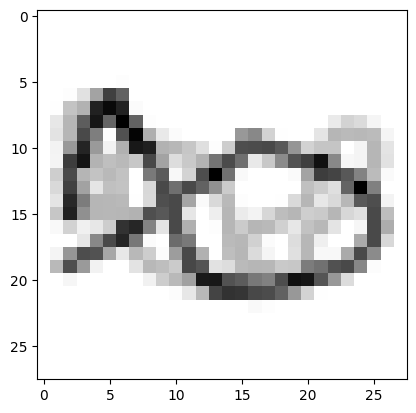

In [27]:
image_mixer(fish_images[1], squirrel_images[2], 0.4)


In [ ]:
!ls


Predict_Model.ipynb api                 test2.png           test_3.png
Super_Model.ipynb   test.png            test4.png


In [46]:
import requests
from urllib.parse import urljoin

base_url = "http://127.0.0.1:8000"
response = requests.request("POST" , 
                            urljoin(base_url , "discriminate") 
                        , params = {"category": "apple"}
                        , files = {"image": open("test2.png", mode="rb")}
                        )
response.json()

{'prediction': -9.02468204498291}

In [ ]:
response.json()

{'prediction': -9.02468204498291}